Veri de bilinmesi gerekenler;

track_id : şarkı Id

track_name: şarkı adı

acousticness : AKUSTİKLİK

danceability : DANS EDİLEBİLİRLİK	

duration ms	: süre (ms)	

energy	: enerji

instrumentalness key : enstrümantalite anahtarı 

liveness :	canlılık

loudness : ses yüksekliği

mode: modu

speechiness	: konuşkanlık

tempo: tempo

time signature: zaman imzası

valence: değerlik

popularity:Popülerlik



Aşağıdaki hedefler baz alınarak, gerekli analizler yapılmıştır:

-En popüler 5 sanatçı

-En gürültülü 5 parça

-En çok dans edilebilen şarkıya sahip sanatçı

-En iyi 10 enstrümental parça

-70'ten fazla popülariteye sahip parçaların akustikliği..



In [1]:
import numpy as np 
import pandas as pd
from Yardım.EDA import *

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data 

In [2]:
data=pd.read_csv('SpotifyFeatures.csv')

data.sample(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
38084,Logic,52bEpsfjhc5Cm98PAcFdRI,1-800-273-8255,0.58000,0.621,250173,0.5800,0.000001,5,0.1910,-7.702,0,0.0430,100.047,4,0.3770,20
10461,Chase Fouraker,0UHgiQ2Z5FXVnWNTQ45uje,Delirious,0.41700,0.722,225231,0.5770,0.000000,0,0.0897,-5.733,1,0.0434,130.011,4,0.3110,40
77025,Pyotr Ilyich Tchaikovsky,0yTPwqJ77eUjHkZbYQNv7c,"Un poco di Chopin, Op.72: No.15",0.99300,0.360,206800,0.0363,0.899000,9,0.0951,-25.838,1,0.0380,89.816,4,0.2670,12
112453,Major Lazer,7IJTgkeqHA1aMqopoyzGrQ,All My Love - Remix,0.03990,0.435,229751,0.8910,0.000000,2,0.1870,-3.907,0,0.1780,115.166,4,0.4370,37
28939,Matt Fella,6NZhiFlc5DvniVO1VYBZbT,Enough,0.04040,0.697,188182,0.7150,0.000007,5,0.1020,-7.820,0,0.0330,110.013,4,0.4700,4
50145,Sam Lee,1gNlZTdqoatgosMp1nH657,Hallucination (Live),0.95500,0.256,981984,0.1090,0.431000,2,0.6900,-27.416,0,0.0408,97.426,4,0.0727,3
22393,Girl Blue,7rhvSWlH07iOhqdTbEcJiE,Lolita,0.32800,0.712,266048,0.4310,0.000005,1,0.1060,-7.498,1,0.0568,77.989,4,0.5150,4
59491,Rayito Colombiano,43SJ1wpy2QCVgzczOpXDvS,"Te Quiero Tanto, Tanto, Tanto (feat. Memo Ménd...",0.20100,0.664,174400,0.6220,0.000000,0,0.1240,-5.874,1,0.0313,94.977,4,0.5990,15
19221,Pete Rock,1hAcX7E4yvReIqrWofNt22,Rap Caviar - Remix,0.13000,0.585,283867,0.7590,0.000000,1,0.1090,-6.171,1,0.3740,87.004,4,0.6610,19
111022,Hardwell,4YHlRRqb0MetLRLPsdrj19,Anthem - Mix Cut,0.00217,0.676,172500,0.9770,0.000147,1,0.2650,-3.029,1,0.1080,127.960,4,0.2020,38


In [3]:
#verinin sutunlarının temel özellikleri ve sutun veri tiplerini görme
DescribeData(data)

                     count           mean            std     min          25%  \
acousticness      130663.0       0.342500       0.345641     0.0       0.0316   
danceability      130663.0       0.581468       0.190077     0.0       0.4590   
duration_ms       130663.0  212633.124098  123155.064847  3203.0  163922.5000   
energy            130663.0       0.569196       0.260312     0.0       0.3960   
instrumentalness  130663.0       0.224018       0.360328     0.0       0.0000   
key               130663.0       5.231894       3.602701     0.0       2.0000   
liveness          130663.0       0.194886       0.167733     0.0       0.0975   
loudness          130663.0      -9.974006       6.544379   -60.0     -11.8980   
mode              130663.0       0.607739       0.488256     0.0       0.0000   
speechiness       130663.0       0.112015       0.124327     0.0       0.0389   
tempo             130663.0     119.473353      30.159636     0.0      96.0140   
time_signature    130663.0  

In [4]:
#NaN değerlerin kontrolü varsa bunların kolonlara oranı
df=controlNaNvalues(data)
df

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64
-----



,Bos_Sutunların_oranı
artist_name,0.0
track_id,0.0
track_name,0.0
acousticness,0.0
danceability,0.0
duration_ms,0.0
energy,0.0
instrumentalness,0.0
key,0.0
liveness,0.0


In [5]:
#Gereksiz kolonlardan kurtulma: 
data.drop('track_id',axis=1,inplace=True)

data.tail(4)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
130659,Saint Claire,Enough for You,0.9180,0.387,194583,0.249,0.0,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,Do It,0.3300,0.717,139191,0.532,0.0,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,No Smoke,0.0079,0.772,180013,0.510,0.0,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50
130662,Banda Los Sebastianes,En Vida,0.5490,0.715,145827,0.734,0.0,3,0.1080,-3.244,1,0.0367,130.128,3,0.9760,55


## EDA 

In [6]:
#En popüler 5 sanatçı demişiz ancak, aşağıdaki dataFrame'de Post Malone'dan iki tane bulunmakta.
data.sort_values(by='popularity',ascending=False)[:5]

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
99393,Daddy Yankee,Con Calma,0.1100,0.737,193227,0.860,0.000002,8,0.0574,-2.652,0,0.0593,93.989,4,0.656,100
99364,Post Malone,Wow.,0.1630,0.833,149520,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385,98
99368,Billie Eilish,bad guy,0.3080,0.708,194088,0.418,0.093000,0,0.1000,-10.998,1,0.3680,131.926,4,0.578,98
123909,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.5200,0.744,158040,0.494,0.000000,2,0.0716,-5.563,1,0.0699,89.972,4,0.927,98
99366,Jonas Brothers,Sucker,0.0427,0.842,181040,0.734,0.000000,1,0.1060,-5.065,0,0.0588,137.958,4,0.952,98


['Daddy Yankee', 'Post Malone', 'Billie Eilish', 'Post Malone', 'Jonas Brothers', 'Ariana Grande']


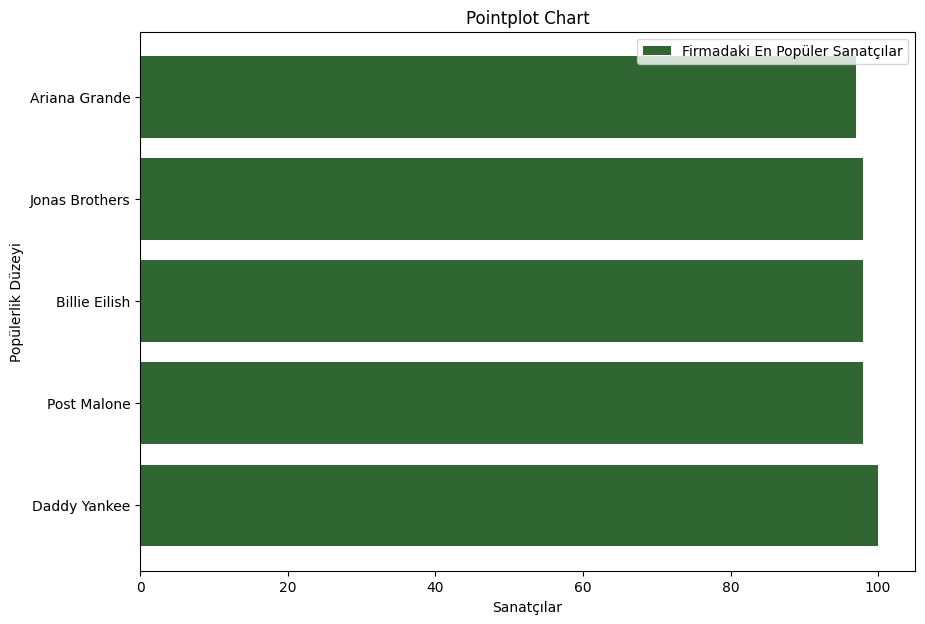

In [7]:
#En popüler 5 sanatçı,
PopularBarPlot(data,6)

In [8]:
data.sort_values(by='loudness',ascending=False)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
24318,araabMUZIK,Bass,0.0449,0.347,182664,0.892,0.925000,8,0.901,1.806,1,0.1880,81.580,4,0.435,16
20658,"Steve Lieberman, The Gangsta Rabbi",The Diarrhea Song,0.0259,0.113,265822,0.846,0.000721,7,0.893,1.750,0,0.0777,151.378,4,0.061,0
23640,araabMUZIK,Lalalala,0.2100,0.354,246935,0.997,0.897000,10,0.594,1.187,0,0.0904,98.522,3,0.409,15
98408,Govind Bajaniya,Sajan Mara Dilni Rani,0.5940,0.357,344491,0.952,0.000000,1,0.134,0.935,1,0.0672,103.887,3,0.811,0
99459,Ritu Chauhan,Jija Ji Devghar Ghumadi,0.1580,0.651,252500,0.998,0.000000,6,0.481,0.905,1,0.2890,155.052,4,0.605,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50315,Old Bike,Khaki Pants,0.0000,0.000,196520,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,24
80442,Old Bike,Sober,0.0000,0.000,171083,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,23
60844,Old Bike,Delicate,0.0000,0.000,146647,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,23
102933,Spencer Wymetalek,Resolve,0.0000,0.000,34923,0.000,0.000000,0,0.000,-60.000,0,0.0000,0.000,0,0.000,56


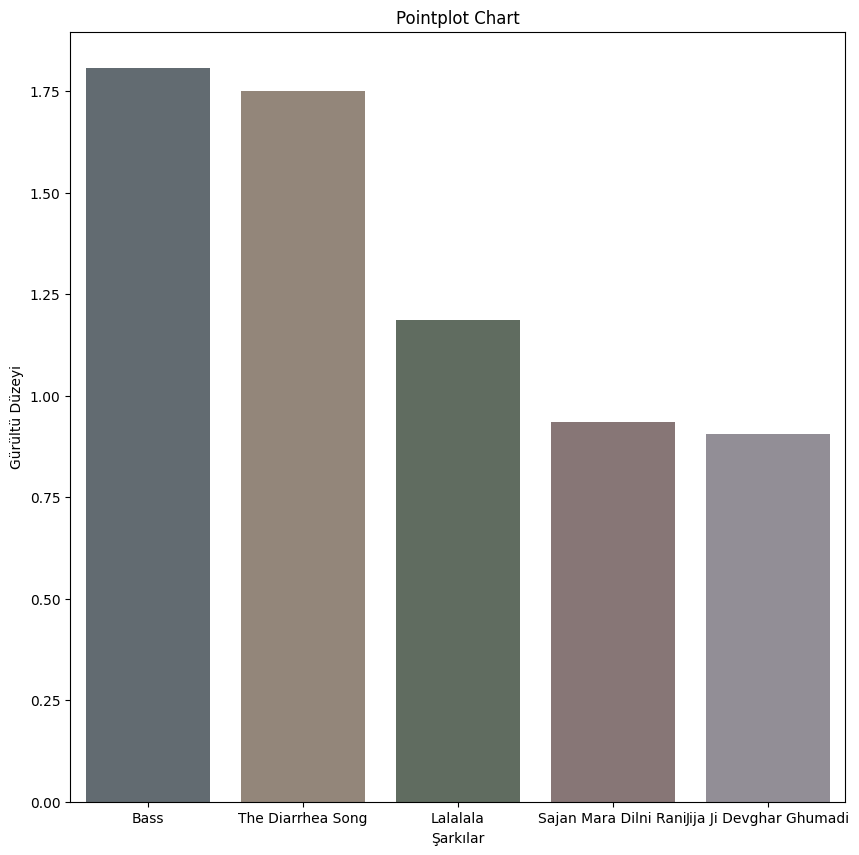

In [9]:
#Şimdi de en gürültülü 5 sanatçıyı bulalım.
LoudnessBarPlot(data,5)

In [10]:
#En çok dans edilebilen şarkıya sahip sanatçı

MostDanceability=data.sort_values(by='danceability',ascending=False)[:1]
MostDanceability


,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
35119,Louie Zong,Tappy Toes,0.579,0.996,64005,0.285,0.528,4,0.0573,-14.849,1,0.559,120.031,4,0.909,28


In [11]:
#Eğer sadece ismi lazım ise;
print(data.loc[MostDanceability.index,"artist_name"])

35119    Louie Zong
Name: artist_name, dtype: object


<Figure size 1000x1000 with 0 Axes>

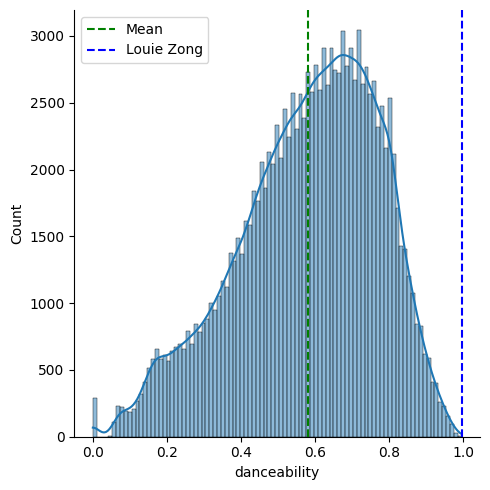

In [12]:
#Peki Louie Zong, Spotify camiasına ne kadar aykırı onu inceleyelim.

plt.figure(figsize=(10,10))

sns.displot(data['danceability'],kde=True)


plt.axvline(x=np.mean(data['danceability']),c='green',ls='--',label='Mean') #ortalama
plt.axvline(x=np.percentile(data['danceability'],100),c='blue',ls='--',label='Louie Zong')#Louie Zong için olacaktır.

plt.legend()
plt.show()

In [13]:
#En iyi 10 enstrümental parça
data.sort_values(by='instrumentalness'
    ,ascending=False)[:3]

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
98698,High Altitude Samples,Soft Brown Noise,0.394,0.000,160003,0.00148,1.0,5,0.111,-31.839,1,0.0000,0.000,0,0.00000,70
68402,Rain Sounds,Gentle Thunderstorm,0.247,0.147,130696,0.99900,1.0,7,0.348,-14.395,1,0.0665,136.235,4,0.00001,28
58349,Granular,Relaxing White Noise One,0.931,0.000,300000,0.00002,1.0,10,0.111,-38.077,0,0.0000,0.000,0,0.00000,40


['Soft Brown Noise', 'Gentle Thunderstorm', 'Relaxing White Noise One', 'Monotone White Noise', 'Brownian Binaural Bliss', 'The Brown Noise', 'Sweeping White Noise', 'Pink Noise for Babies (Free Sleep Noise)', 'REM Sleep and Inner Peace (Theta Waves) - Loopable', 'Noise Blocking Pink']


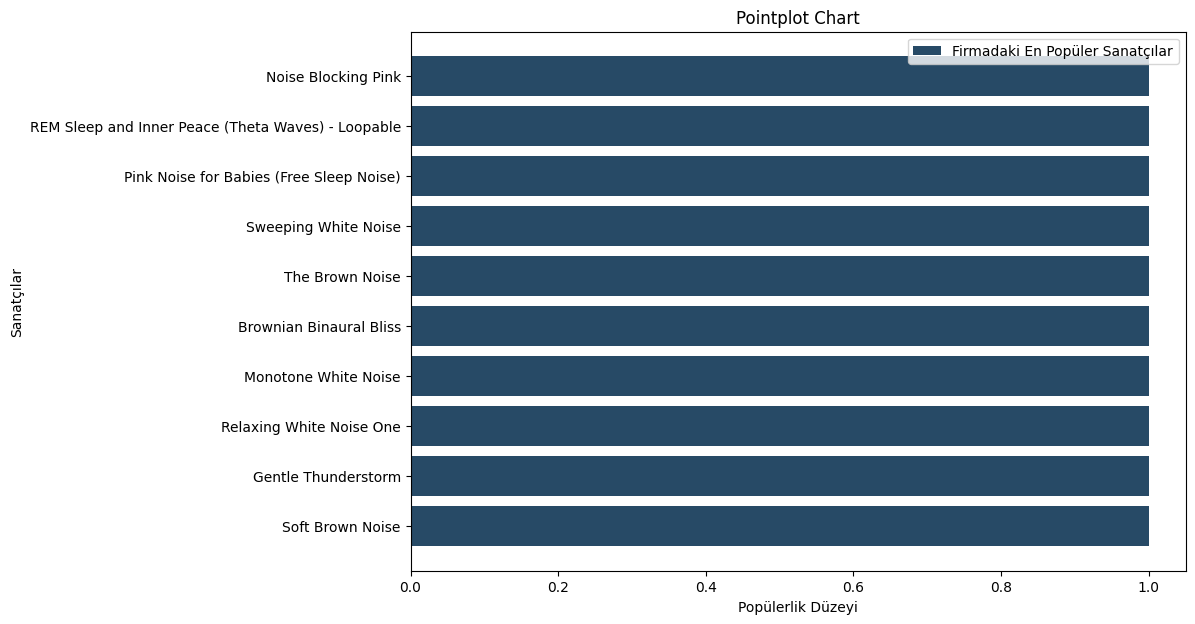

In [14]:
#En iyi 10 enstrümental parça
BarPlot(data,'instrumentalness',10,'#274A66')#data,degiskenAdı,TopN,color kodu şeklinde girilmelidir.


In [15]:
#70'ten fazla popülariteye sahip parçaların akustikliği..
data[data['popularity']>70].sort_values(by='acousticness',ascending=False)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
125436,Regina Mira,October,0.996000,0.493,108770,0.01000,0.962000,10,0.1150,-26.589,1,0.0484,69.470,3,0.3490,72
125400,Max Richter,A Catalogue Of Afternoons,0.996000,0.124,110880,0.09240,0.848000,11,0.0935,-31.726,1,0.0412,205.999,5,0.1350,72
119238,Sigríður,Welcome Home,0.995000,0.226,252960,0.09340,0.859000,2,0.1170,-27.254,0,0.0431,128.904,4,0.2010,71
98644,Claes Nilsson,The Sleeper,0.993000,0.178,159071,0.00986,0.802000,0,0.1120,-24.757,1,0.0403,92.709,1,0.0911,73
115452,Steven Goldmund,Mind-Drift,0.984000,0.144,240000,0.01510,0.982000,8,0.1020,-32.452,1,0.0397,140.096,5,0.0385,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124324,The 1975,It's Not Living (If It's Not With You),0.000297,0.618,248336,0.82400,0.000069,1,0.0649,-5.316,1,0.0301,121.238,4,0.5980,78
101792,WALK THE MOON,Timebomb,0.000276,0.583,218589,0.77800,0.000000,5,0.6210,-4.766,1,0.0403,122.053,4,0.4460,73
123983,21 Savage,1.5,0.000244,0.885,148656,0.52000,0.000001,1,0.4540,-8.353,1,0.3590,84.022,4,0.3060,74
98849,M-22,White Lies,0.000156,0.427,176378,0.91600,0.000005,4,0.1540,-3.716,0,0.1160,123.539,4,0.6880,71


Story-Telling kısmı;
Örneğin bir firma şirketi yeni bir star yaratmaya çalışıyor ve bu starı istastiksel temele dayandırarak veri biliminden faydalanmak için bize başvurdu.Yeni bir star yaratmanız gerekiyor,işte verilecek tavsiyeler

In [ ]:
def msToMinute(x):
    return  x/ 60000 # çünkü 1 saniye 1000 milisaniye, 1 dakika 60 saniye olduğunda :)

In [16]:
x=data.groupby('popularity').agg({'acousticness': 'mean', 'energy': 'mean','duration_ms':'mean','speechiness':'mean'})

#Popülerliği 90 üzerinde olan, akustikliği ve enerjisine, milisaniyesine, ve konuşkanlığına bakalım.

x=x.iloc[-10:,:]


,acousticness,energy,minute,speechiness
popularity,,,,
90,0.243330,0.643778,3.317389,0.128111
91,0.289554,0.557706,3.358907,0.142529
92,0.357257,0.533000,3.418098,0.127457
93,0.258588,0.576667,3.583511,0.234683
94,0.242900,0.661636,3.543270,0.109545
95,0.215867,0.675333,3.013528,0.165333
96,0.325586,0.569000,3.349976,0.090729
97,0.042100,0.554000,3.174000,0.091700
98,0.258425,0.546250,2.844533,0.168675


In [ ]:
x['duration_ms']=x['duration_ms'].apply(msToMinute)


x.columns=['acousticness','energy','minute','speechiness']
x
#Ancak bu şekilde müşterimize anlatamayız. Daha çok görselleştirmemiz gerekiyor.

In [17]:
data_copy=data.copy()

data_copy['duration_ms']=data_copy['duration_ms'].apply(msToMinute)
MostPopulardf=data_copy[data_copy['popularity']>90]
MostPopulardf.shape

(60, 16)

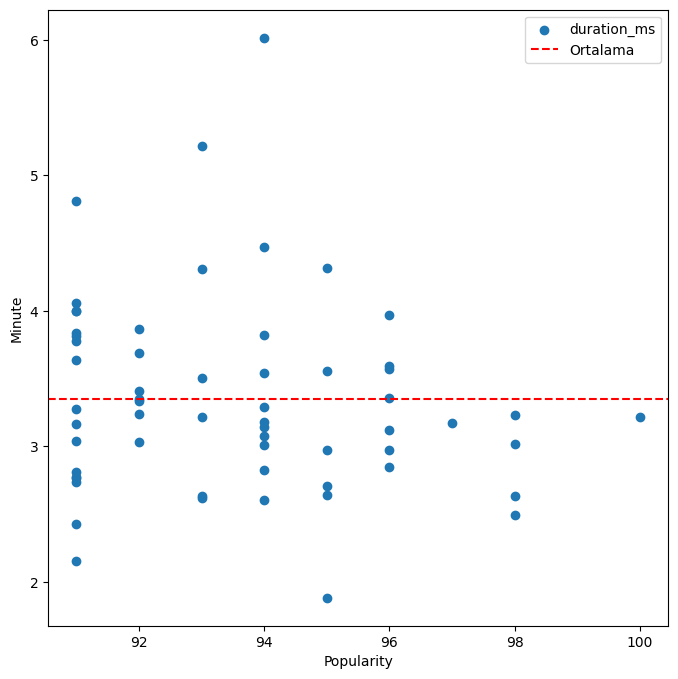

In [18]:
#Şarkının süresi için fikir vermek adına ;
plt.figure(figsize=(8,8))
plt.scatter(data=MostPopulardf, x='popularity', y='duration_ms')
plt.axhline(y=np.mean(MostPopulardf['duration_ms']),c='red',ls='--',label='Ortalama')
plt.xlabel('Popularity')
plt.ylabel('Minute')
plt.legend()
plt.show()

#Popülerlik kazanmak istiyorsanız şarkılarınız 3 ve 4 dakika arasında olmasına dikkat edin uyarısı verebiliriz.

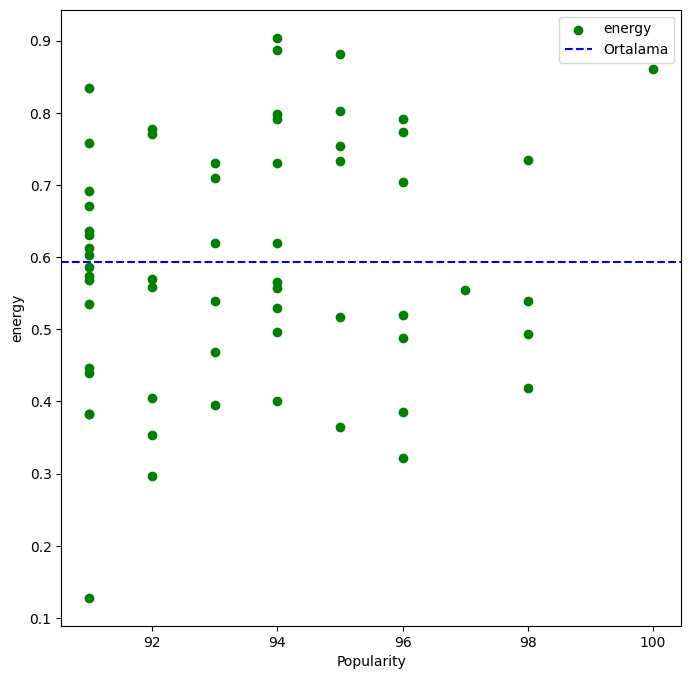

In [19]:
#Şarkı enerjisi için ; 0.6'dan bir tık uzak bir yakın şarkılar yapabilirsiniz. Sektör'de düşük enerjili pek tutmuyor diyebiliriz.

plt.figure(figsize=(8,8))
plt.scatter(data=MostPopulardf, x='popularity', y='energy',color='green')
plt.axhline(y=np.mean(MostPopulardf['energy']),c='blue',ls='--',label='Ortalama')
plt.xlabel('Popularity')
plt.ylabel('energy')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


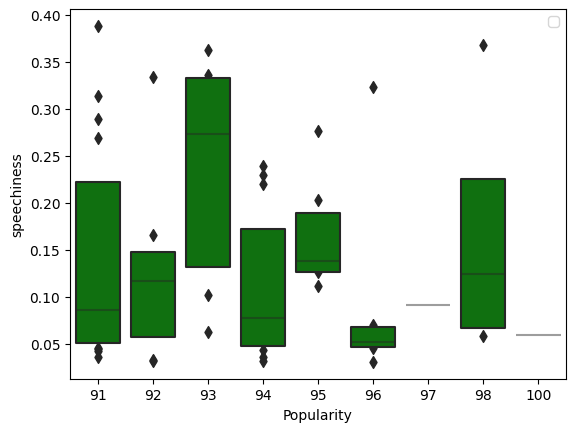

In [20]:
# speechiness ; peki şarkı sözleri çok olmalı mı ? 
sns.boxenplot(data=MostPopulardf,x=MostPopulardf["popularity"], y=MostPopulardf["speechiness"],color="g") 
plt.xlabel('Popularity')
plt.ylabel('speechiness')
plt.legend()
plt.show()

#Burada yukarıdakiler kadar net tavsiyeler yok.

<Axes: xlabel='popularity', ylabel='acousticness'>

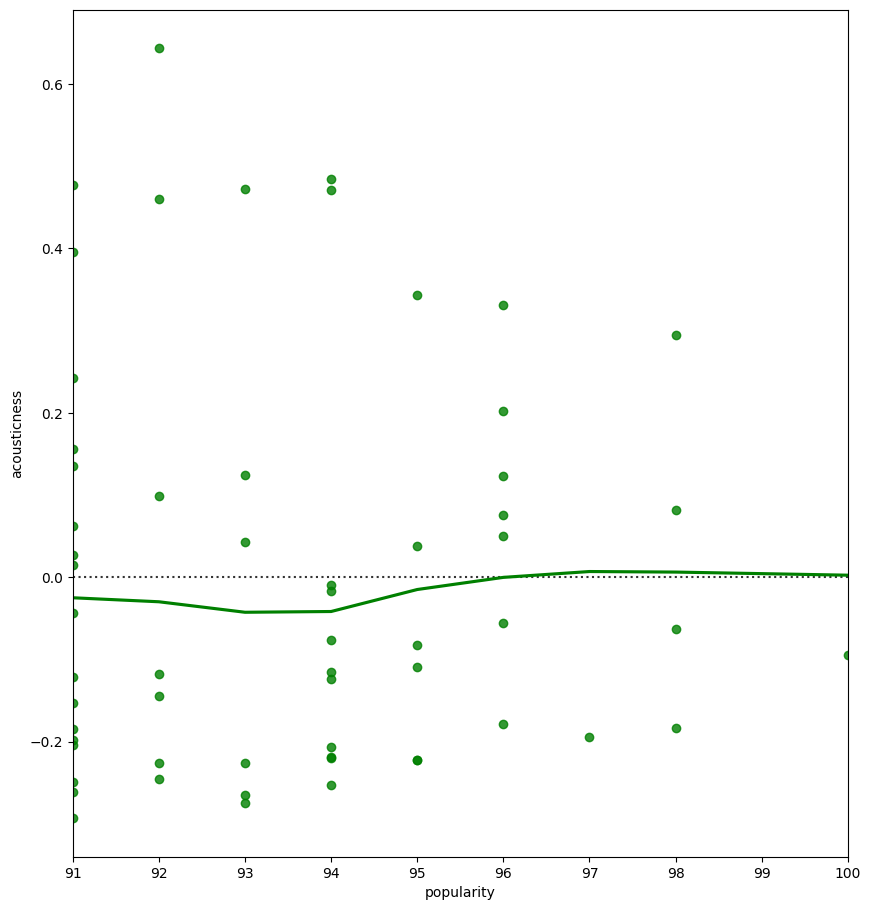

In [21]:
#Siz o kadar da uğraşmadan, seaborn ile yapabilirsiniz. 


plt.figure(figsize=(10,11))
sns.residplot(data=MostPopulardf,x="popularity", y="acousticness", lowess=True, color="g")

#Çoğunlukla az akustikli bir şarkı yapmanız tavsiye edilir.

<Axes: xlabel='popularity', ylabel='loudness'>

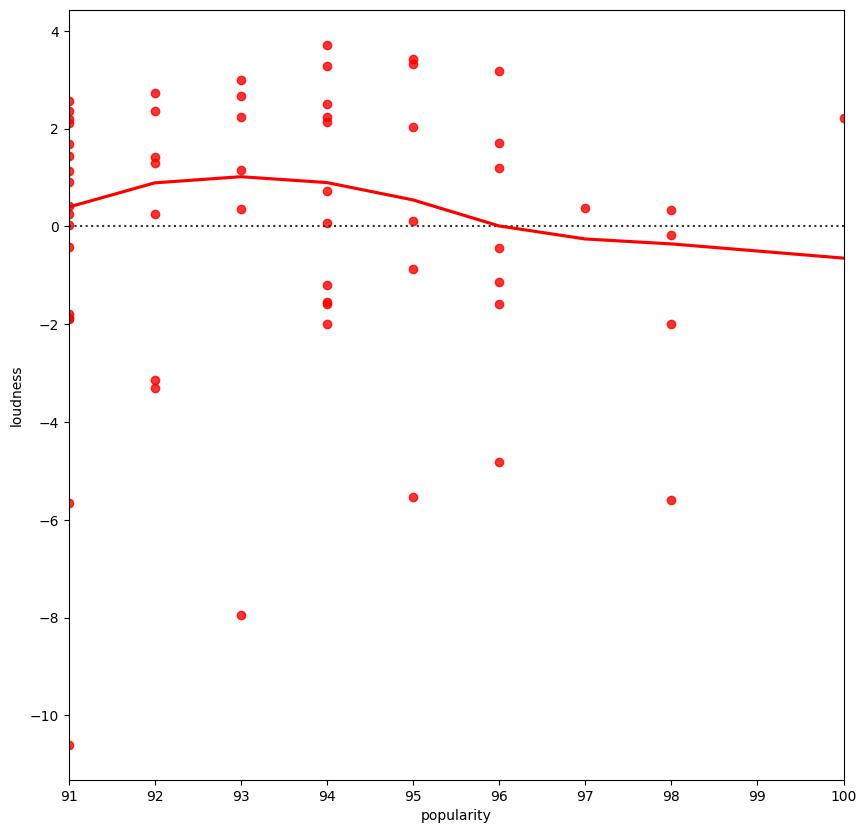

In [22]:
#Şarkının ses yüksekliğine bakalım.

plt.figure(figsize=(10,10))
sns.residplot(data=MostPopulardf,x="popularity", y="loudness", lowess=True, color="r")

#Siz en iyisi ses yüksekliği yüksek olan şarkılar yapın önerisi yapılabilir.

### Statistical concept

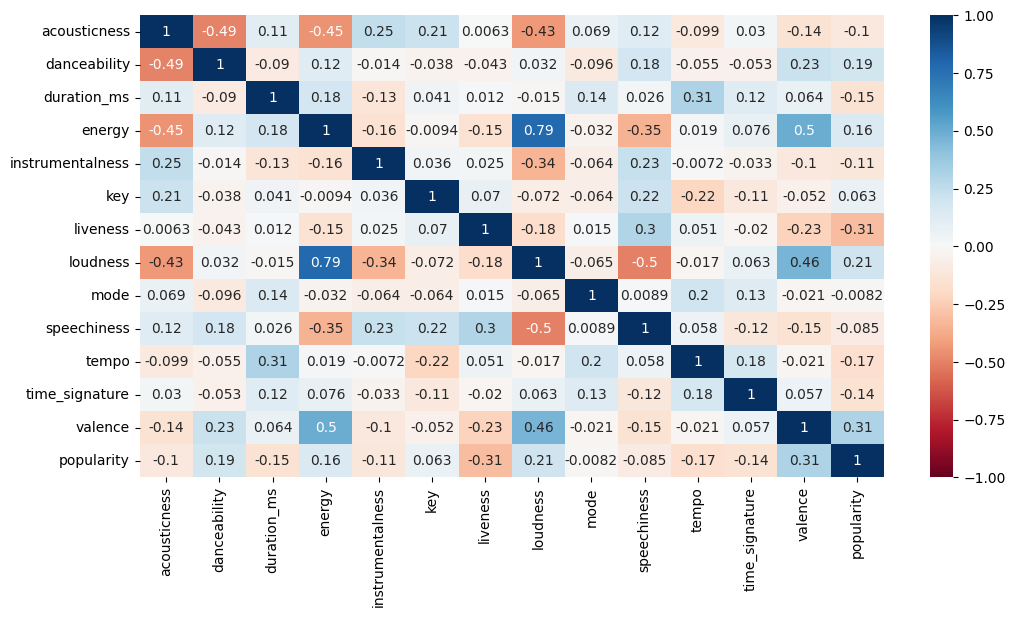

In [23]:
#90 'üzerinde olanlar için bir korelasyon grafiği çizilmiştir.
plt.figure(figsize=(12,6))
sns.heatmap(MostPopulardf.corr(), vmin=-1, vmax=1, annot=True, cmap="RdBu")
plt.show()

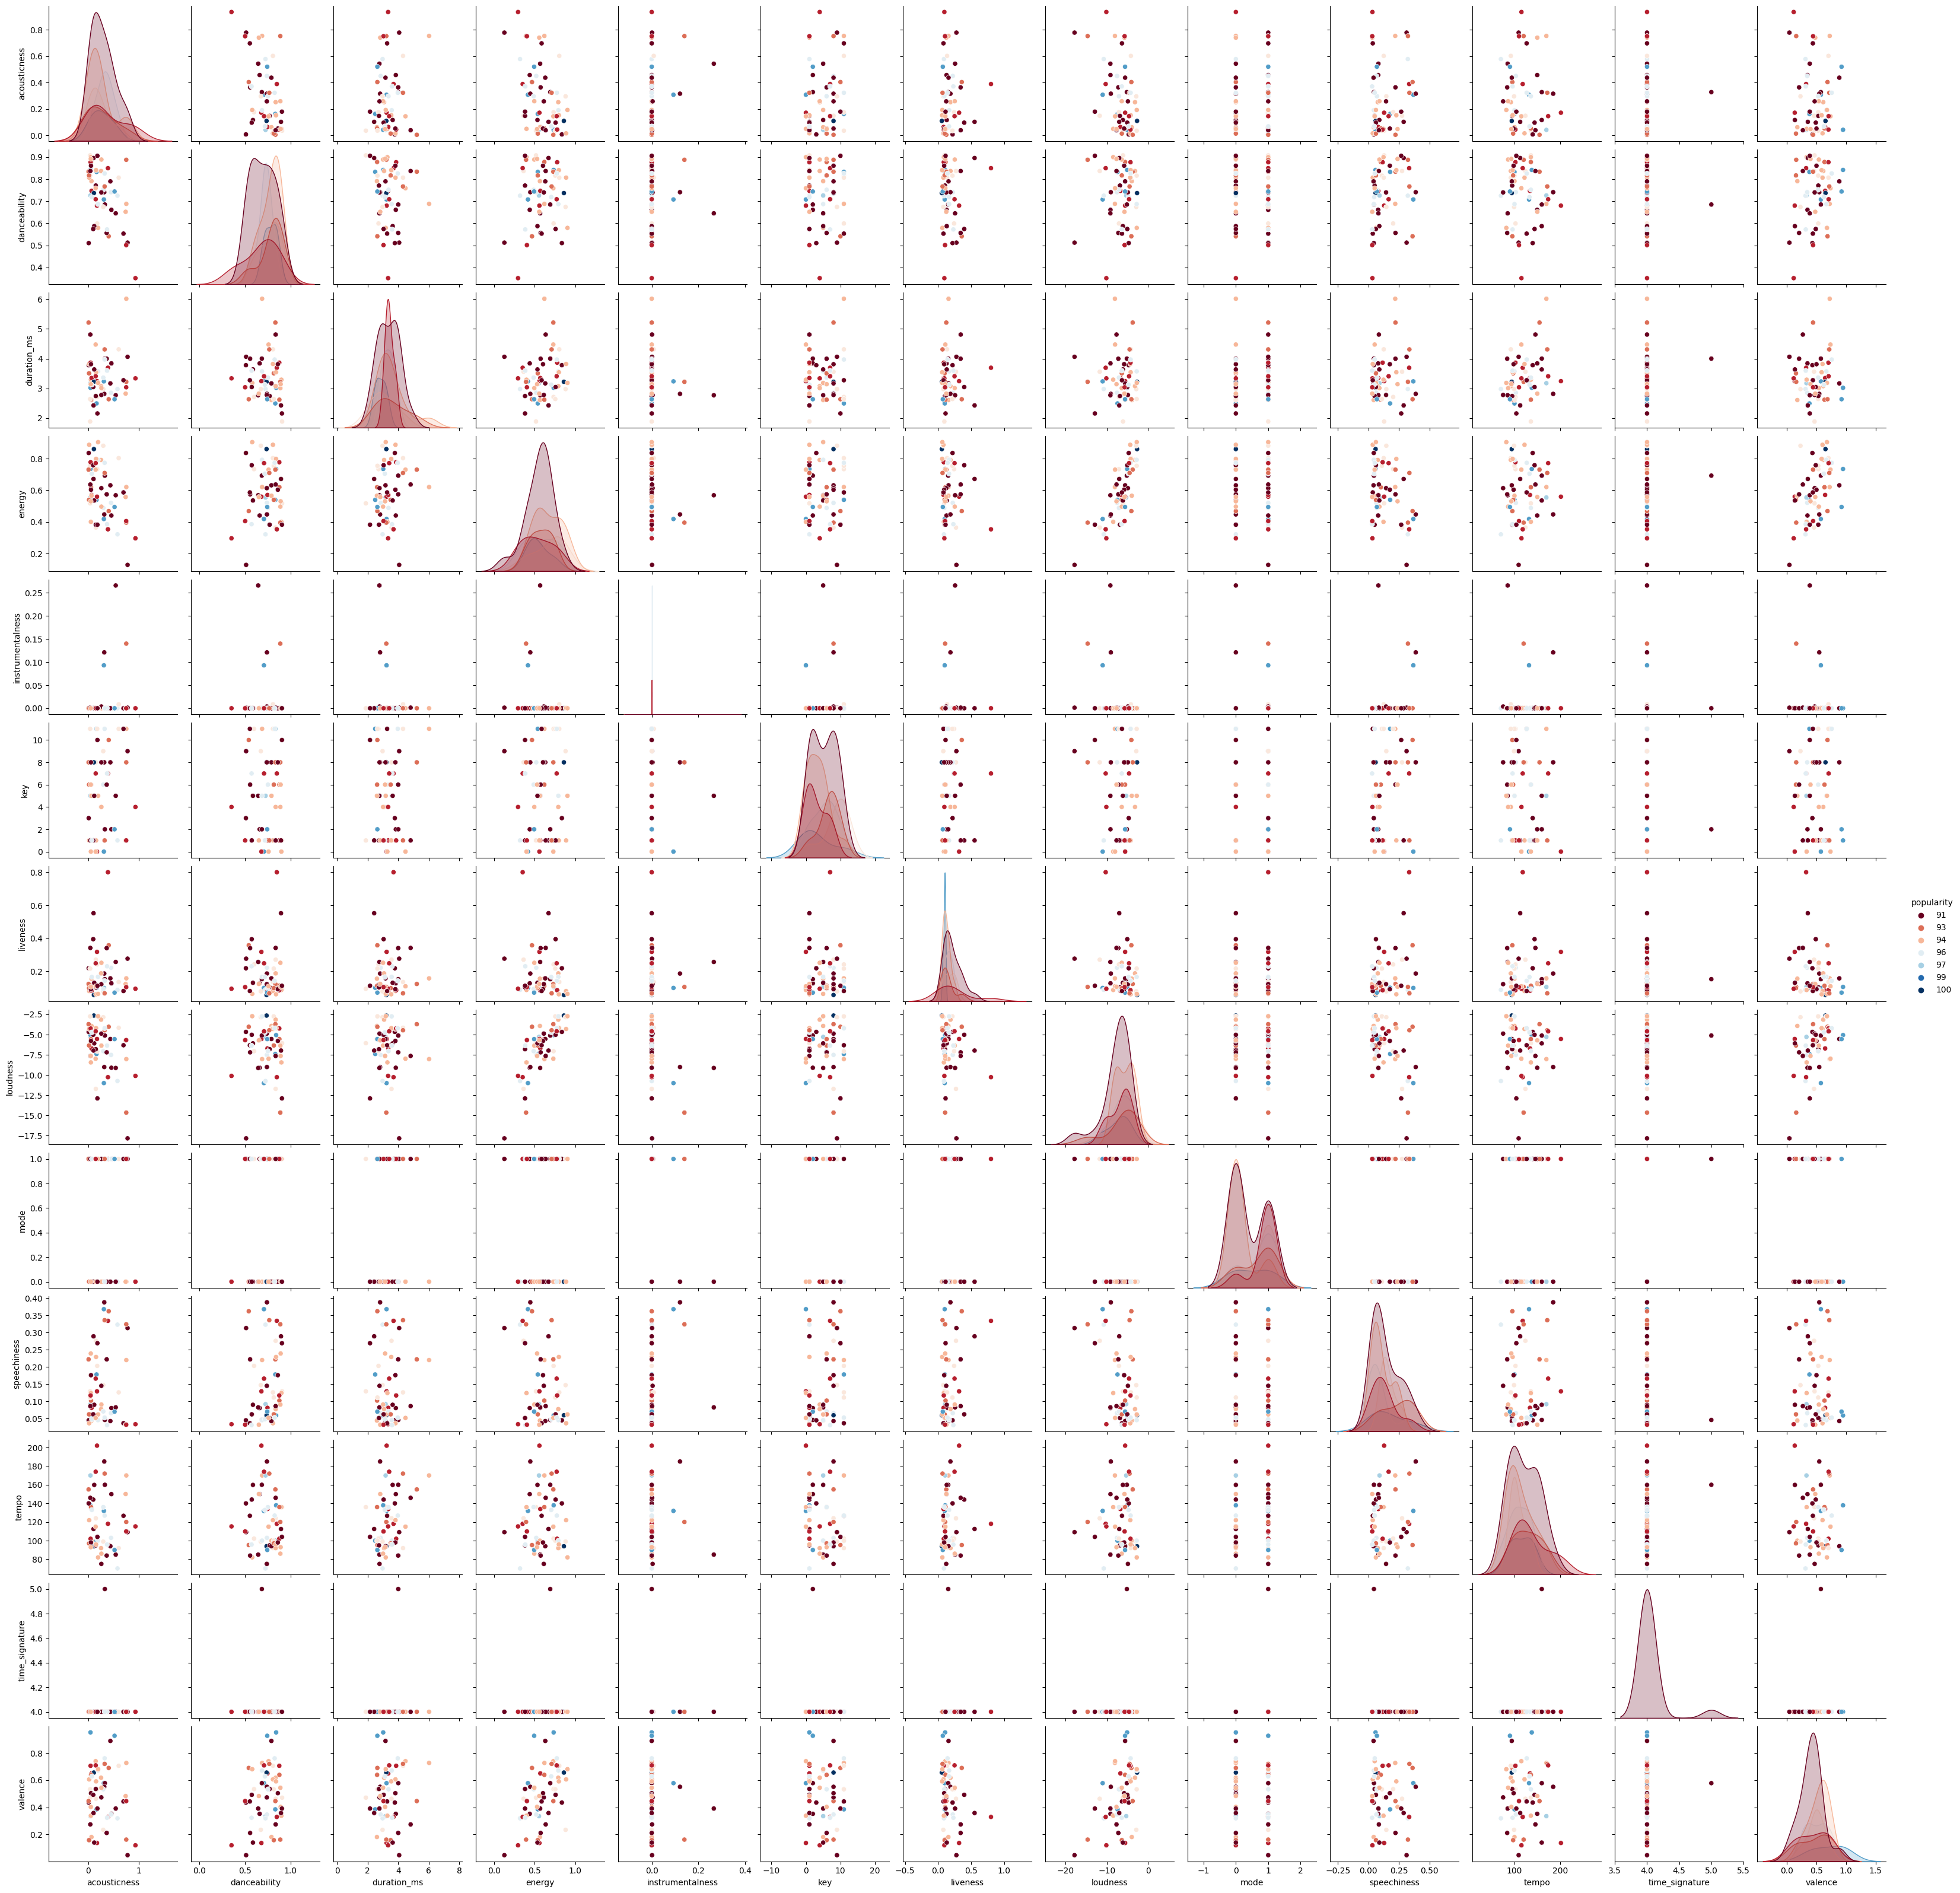

In [24]:
sns.pairplot(data=MostPopulardf,hue="popularity",palette="RdBu")

In [25]:
#Done!